In [48]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import integrate, stats

## 正規分布の確率密度関数
$N(\mu, \sigma^2)$と表す
$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp({-\frac{1}{2} (\frac{X-\mu}{\sigma})^2})
$$
$\mu$: 平均(mean)  
$\sigma$: 標準偏差(standard deviation)  

Text(0.5, 1.0, 'Normal distribution | Probability density function (pdf)')

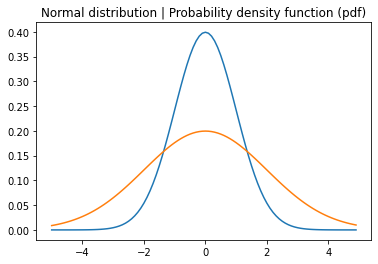

In [106]:
def calc_normal_distribution(x_list, mu, average):
    y = [
        1 / (mu * (2 * pi) ** 0.5) * math.exp(-1 / 2 * (x - average) ** 2 / mu ** 2)
        for x in x_list
    ]
    return y


mu = 1
average = 0
pi = 3.14
x = np.arange(-5, 5, 0.1)
y = calc_normal_distribution(x, mu, average)
plt.plot(x, y)

mu = 2
average = 0
pi = 3.14
x = np.arange(-5, 5, 0.1)
y = calc_normal_distribution(x, mu, average)
plt.plot(x, y)
plt.title("Normal distribution | Probability density function (pdf)")

## 標準正規分布に従った乱数

Text(0.5, 1.0, 'Normal distribution | Histogram')

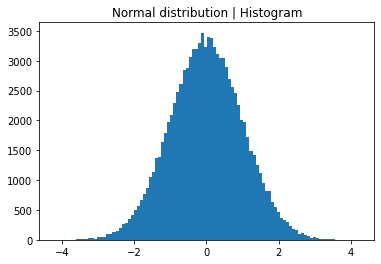

In [86]:
a = np.random.randn(100000)
hist, bins = np.histogram(a, 100)
plt.hist(a, bins)
plt.title("Normal distribution | Histogram")

Text(0.5, 1.0, 'Normal distribution | Probability density function')

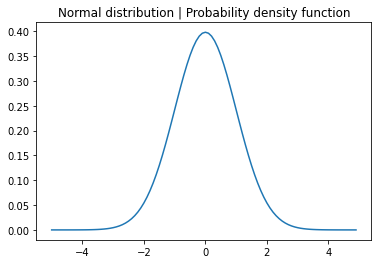

In [87]:
mu = np.std(a)
average = a.mean()
pi = 3.14
x = np.arange(-5, 5, 0.1)
y = calc_normal_distribution(x, mu, average)
plt.plot(x, y)
plt.title("Normal distribution | Probability density function")

## 正規性の検定
### シャピロ-ウィルク検定 
### コルモゴロフ-スルミノフ検定(1標本KS検定)
  
指標：ｐ値，95%信頼区間の場合は$p<0.05$，99%信頼区間の場合は$p<0.01$で統計的有意  
帰無仮説(H0)：データが正規分布に従う 

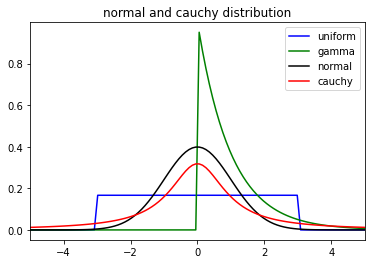

In [129]:
# 正規分布，コーシー分布，一様分布，ガンマ分布の描画
x = np.linspace(-5, 5, 100)

pdf_norm = stats.norm.pdf(x)
pdf_cauchy = stats.cauchy.pdf(x)
pdf_uniform = stats.uniform.pdf(x, loc=-3, scale=6)
pdf_gamma = stats.gamma.pdf(x, 1)

plt.plot(x, pdf_norm, "k", label="normal")
plt.plot(x, pdf_cauchy, "r", label="cauchy")
plt.plot(x, pdf_uniform, "b", label="uniform")
plt.plot(x, pdf_gamma, "g", label="gamma")
plt.xlim(-5, 5)
plt.legend(loc="best")
plt.title("normal and cauchy distribution")
plt.show()

In [143]:
data_norm = stats.norm.rvs(size=500)
data_cauchy = stats.cauchy.rvs(size=500)
data_uniform = stats.uniform.rvs(size=500, loc=-3, scale=6)
data_gamma = stats.gamma.rvs(1, size=500)

#シャピロ-ウィルク検定
# 有意水準(significance level)=0.05とする
sl = 0.05
result_norm = stats.shapiro(data_norm)
result_cauchy = stats.shapiro(data_cauchy)
result_uniform = stats.shapiro(data_uniform)
result_gamma = stats.shapiro(data_gamma)

print('p value (norm):', round(result_norm.pvalue, 5))
print('p value (cauchy):', round(result_cauchy.pvalue, 5))
print('p value (uniform):', round(result_uniform.pvalue, 5))
print('p value (gamma):', round(result_gamma.pvalue, 5))

p value (norm): 0.20799
p value (cauchy): 0.0
p value (uniform): 0.0
p value (gamma): 0.0


In [142]:
#1標本KS検定実施
# 有意水準(significance level)=0.05とする
sl = 0.05
result_norm = stats.kstest(data_norm,'norm')
result_cauchy = stats.kstest(data_cauchy,'norm')
result_uniform = stats.kstest(data_uniform, 'norm')
result_gamma = stats.kstest(data_gamma, 'norm')

print('p value (norm):', round(result_norm.pvalue, 5))
print('p value (cauchy):', round(result_cauchy.pvalue, 5))
print('p value (uniform):', round(result_uniform.pvalue, 5))
print('p value (gamma):', round(result_gamma.pvalue, 5))

p value (norm): 0.99782
p value (cauchy): 0.0
p value (uniform): 0.0
p value (gamma): 0.0
